# Exploratory Data analysis : (EDA)

### 1) Problem Statment:

Customer churn is a significant challenge for companies in the telecommunications industry. Retaining customers is often more cost-effective than acquiring new ones, making the ability to predict which customers are likely to churn crucial for developing targeted retention strategies. This project aims to develop a predictive model for identifying customers at risk of leaving a telecommunications company, based on historical customer data.

We will utilize the Telco Customer Churn dataset from Kaggle to analyze customer behavior, explore potential causes of churn, and build a machine learning model to predict which customers are likely to churn. By doing so, the goal is to help the company take proactive measures to retain high-risk customers, ultimately improving customer satisfaction and reducing churn rates.

### 2) Data collection :

The dataset used for this project is the **Telco Customer Churn dataset** , sourced from Kaggle, which contains information about a telecom company’s customers and their associated attributes. It includes features such as:

*  Customer demographics: Age, gender, partner status, dependents, etc.

*  Account information: Contract type, tenure, and payment method.

*  Service usage: Internet service, online security, and tech support.

*  Churn label: Whether the customer has churned (left the company) or not.

The dataset is structured with 7,043 rows (customers) and 21 columns (features). This dataset has been cleaned and preprocessed to some extent, but further data exploration and preprocessing are necessary before developing predictive models.

### 3) Data undrestanding and description :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
plt.style.use("fivethirtyeight")

### Import the data :

In [2]:
# Import the data :
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

### Dataset columns :

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


1. **customerID**:
   - **Description**: A unique identifier for each customer.
   - **Type**: Categorical/ID (no predictive value, but can be used for referencing individual customers).

2. **gender**:
   - **Description**: The gender of the customer (male or female).
   - **Type**: Categorical (Nominal)
   - **Values**: Male, Female

3. **SeniorCitizen**:
   - **Description**: Whether the customer is a senior citizen (65 years or older).
   - **Type**: Categorical (Binary)
   - **Values**: 0 (No), 1 (Yes)

4. **Partner**:
   - **Description**: Whether the customer has a partner.
   - **Type**: Categorical (Binary)
   - **Values**: Yes, No

5. **Dependents**:
   - **Description**: Whether the customer has dependents (children or others).
   - **Type**: Categorical (Binary)
   - **Values**: Yes, No

6. **tenure**:
   - **Description**: The number of months the customer has been with the company.
   - **Type**: Numerical (Continuous)
   - **Values**: An integer representing the number of months.

7. **PhoneService**:
   - **Description**: Whether the customer subscribes to the phone service.
   - **Type**: Categorical (Binary)
   - **Values**: Yes, No

8. **MultipleLines**:
   - **Description**: Whether the customer has multiple phone lines.
   - **Type**: Categorical (Binary)
   - **Values**: Yes, No, No phone service

9. **InternetService**:
   - **Description**: The type of internet service the customer subscribes to.
   - **Type**: Categorical (Nominal)
   - **Values**: DSL, Fiber optic, No

10. **OnlineSecurity**:
    - **Description**: Whether the customer has online security as part of their internet service.
    - **Type**: Categorical (Binary)
    - **Values**: Yes, No, No internet service

11. **OnlineBackup**:
    - **Description**: Whether the customer has online backup as part of their internet service.
    - **Type**: Categorical (Binary)
    - **Values**: Yes, No, No internet service

12. **DeviceProtection**:
    - **Description**: Whether the customer has device protection as part of their internet service.
    - **Type**: Categorical (Binary)
    - **Values**: Yes, No, No internet service

13. **TechSupport**:
    - **Description**: Whether the customer has technical support as part of their internet service.
    - **Type**: Categorical (Binary)
    - **Values**: Yes, No, No internet service

14. **StreamingTV**:
    - **Description**: Whether the customer has TV streaming services as part of their internet service.
    - **Type**: Categorical (Binary)
    - **Values**: Yes, No, No internet service

15. **StreamingMovies**:
    - **Description**: Whether the customer has movie streaming services as part of their internet service.
    - **Type**: Categorical (Binary)
    - **Values**: Yes, No, No internet service

16. **Contract**:
    - **Description**: The type of contract the customer has with the company.
    - **Type**: Categorical (Nominal)
    - **Values**: Month-to-month, One year, Two year

17. **PaperlessBilling**:
    - **Description**: Whether the customer has paperless billing.
    - **Type**: Categorical (Binary)
    - **Values**: Yes, No

18. **PaymentMethod**:
    - **Description**: The customer's preferred payment method.
    - **Type**: Categorical (Nominal)
    - **Values**: Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check

19. **MonthlyCharges**:
    - **Description**: The amount the customer pays per month for their services.
    - **Type**: Numerical (Continuous)
    - **Values**: A numerical value representing the monthly charges in dollars.

20. **TotalCharges**:
    - **Description**: The total amount charged to the customer for their service since joining the company.
    - **Type**: Numerical (Continuous)
    - **Values**: A numerical value representing the total charges in dollars.

21. **Churn**:
    - **Description**: Whether the customer has churned (left the service) or not.
    - **Type**: Categorical (Binary) — Target variable
    - **Values**: Yes, No


### Cheking for messing values :

In [6]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


### Checking for dupliated values :

In [7]:
df.duplicated().sum()

np.int64(0)

### Check the number of unique values in each column :

In [8]:
df.nunique()

,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


### Define numerical & categorical columns :

In [9]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != object]
categorical_features = [feature for feature in df.columns if df[feature].dtype == object]

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['SeniorCitizen', 'tenure', 'MonthlyCharges']

We have 18 categorical features : ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


### Statistics summary for numerical variables :

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


### Categories in categorical columns :

In [11]:
categorical_features = ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                        'TotalCharges', 'Churn']

# Loop through each categorical feature and print the unique values
for feature in categorical_features:
    print("\n")
    print(f"Categories in '{feature}':     ", end=" ", )
    print(df[feature].unique())




Categories in 'customerID':      ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']


Categories in 'gender':      ['Female' 'Male']


Categories in 'Partner':      ['Yes' 'No']


Categories in 'Dependents':      ['No' 'Yes']


Categories in 'PhoneService':      ['No' 'Yes']


Categories in 'MultipleLines':      ['No phone service' 'No' 'Yes']


Categories in 'InternetService':      ['DSL' 'Fiber optic' 'No']


Categories in 'OnlineSecurity':      ['No' 'Yes' 'No internet service']


Categories in 'OnlineBackup':      ['Yes' 'No' 'No internet service']


Categories in 'DeviceProtection':      ['No' 'Yes' 'No internet service']


Categories in 'TechSupport':      ['No' 'Yes' 'No internet service']


Categories in 'StreamingTV':      ['No' 'Yes' 'No internet service']


Categories in 'StreamingMovies':      ['No' 'Yes' 'No internet service']


Categories in 'Contract':      ['Month-to-month' 'One year' 'Two year']


Categories in 'PaperlessBilling':   

### Columns modification :

In [12]:
df['TotalCharges'] = df['TotalCharges'].replace({" ": "0.0"}).astype(float)

In [13]:
df.drop(columns = ['customerID'], inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Visualisation :

### Distribution of numerical columns :

In [14]:
def plot_distribution(df, column_name):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column_name], kde = True)
    plt.title(f"Distribution of {column_name}")

    col_mean = df[column_name].mean()
    col_median = df[column_name].median()
    plt.axvline(col_mean, color = "red", linestyle="--", label="Mean")
    plt.axvline(col_median, color = "blue", linestyle="--", label="Median")

    plt.legend()

    plt.subplot(1, 2, 2)
    sns.boxplot(y  = df[column_name])
    plt.title(f"Boxplot of {column_name}")
    plt.show()

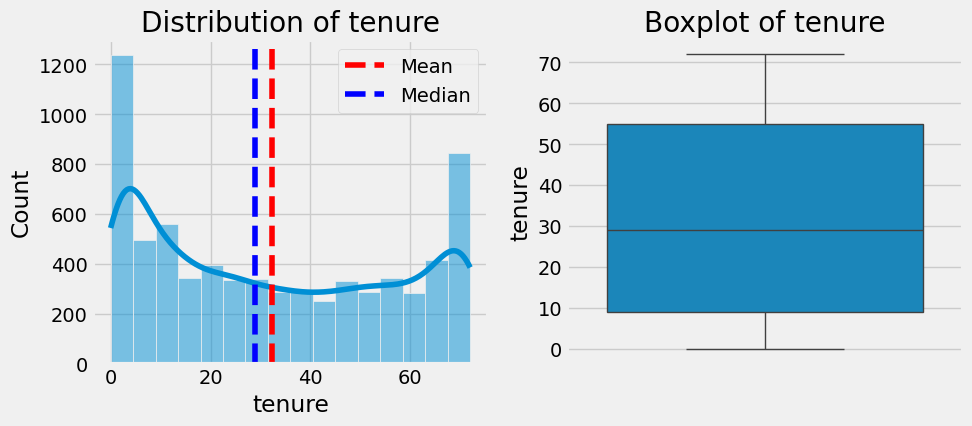

In [15]:
plot_distribution(df, "tenure")

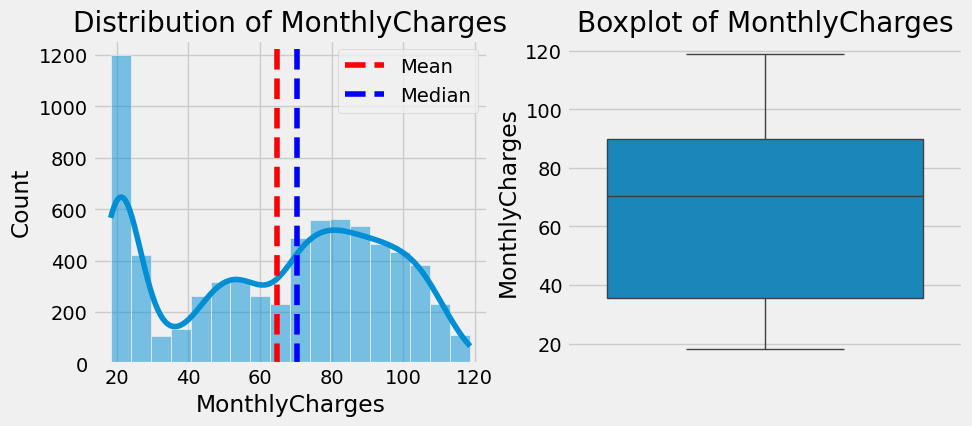

In [16]:
plot_distribution(df, "MonthlyCharges")

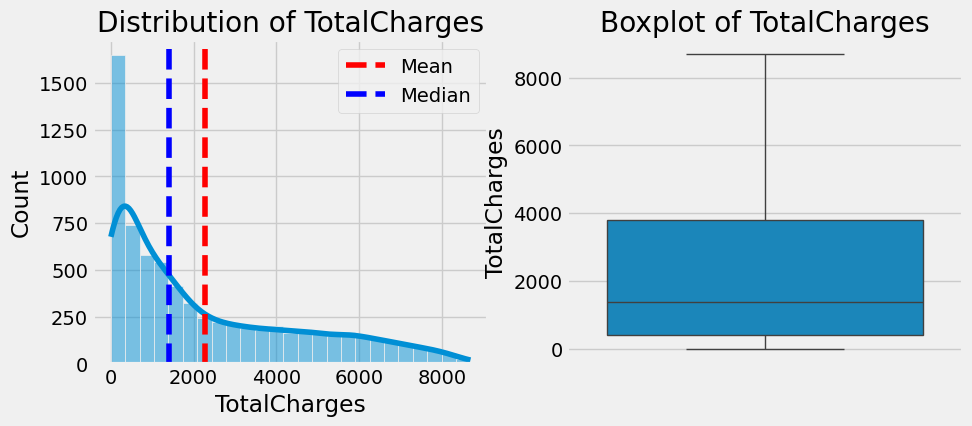

In [17]:
plot_distribution(df, "TotalCharges")

### Distribution of categorical columns :

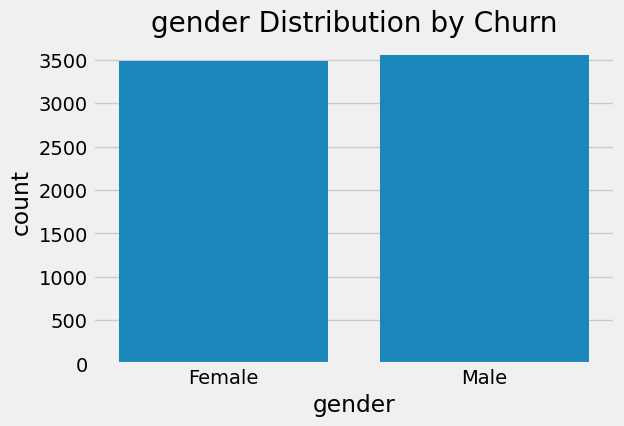

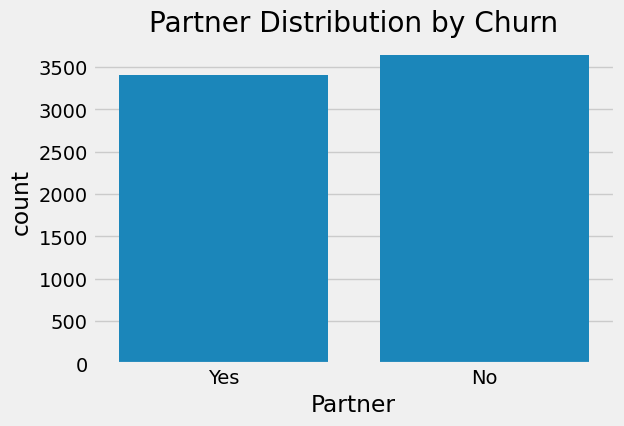

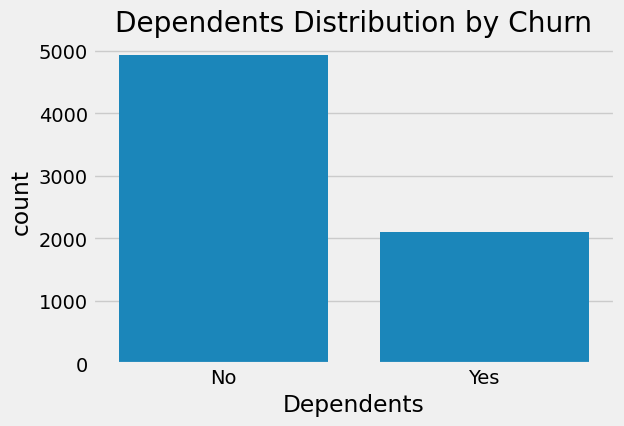

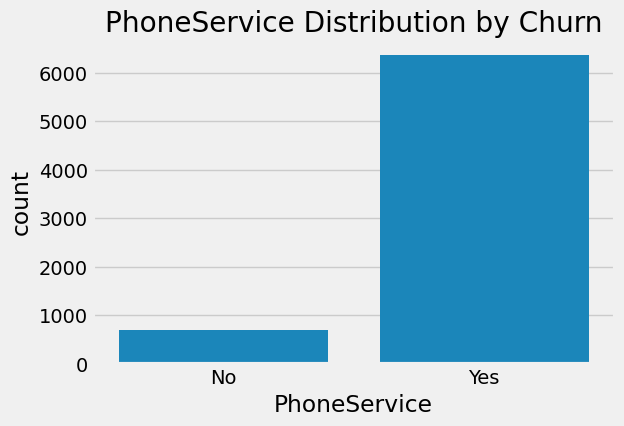

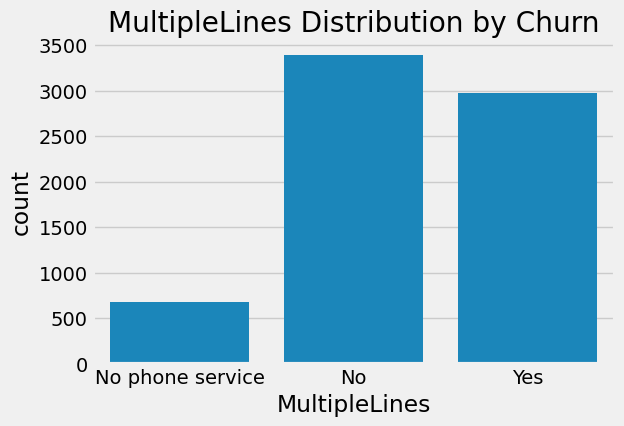

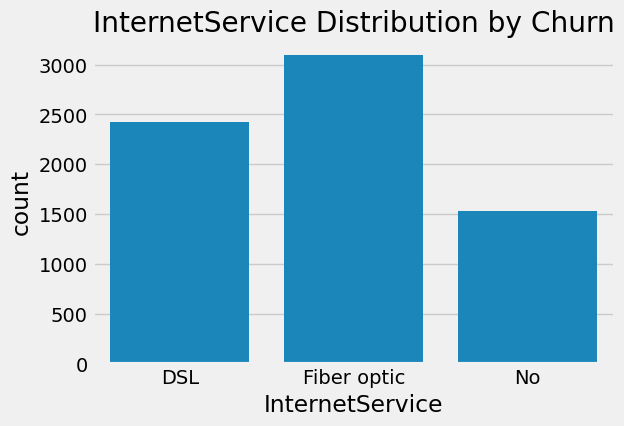

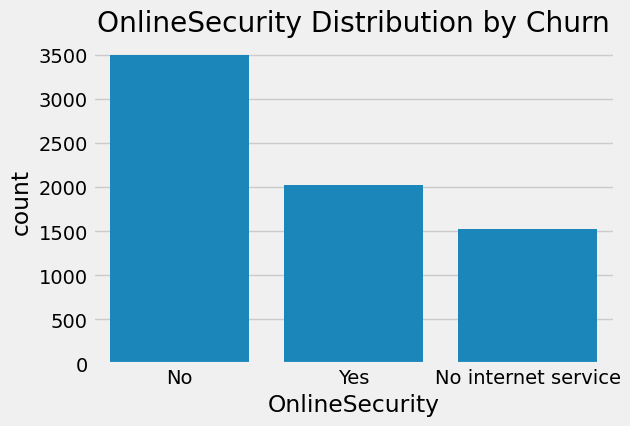

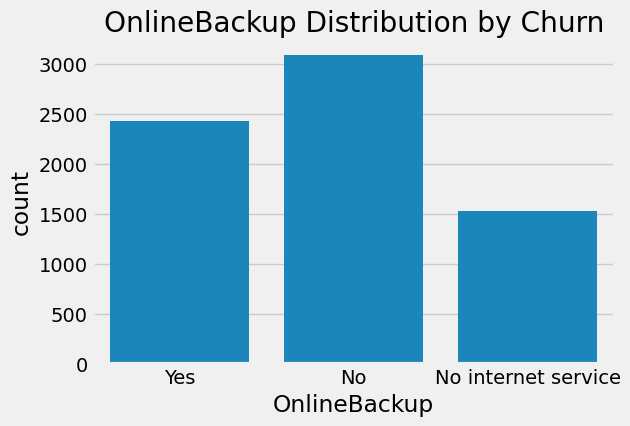

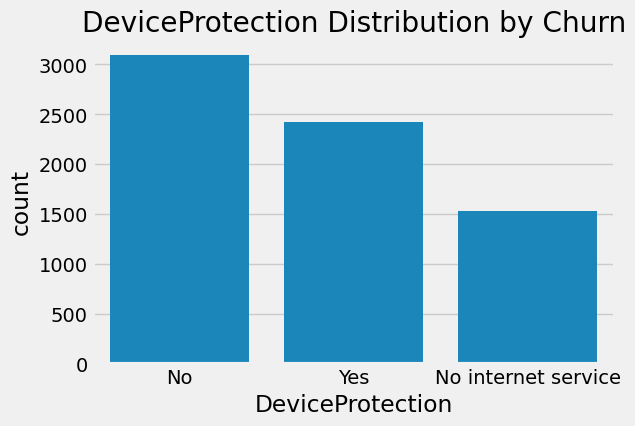

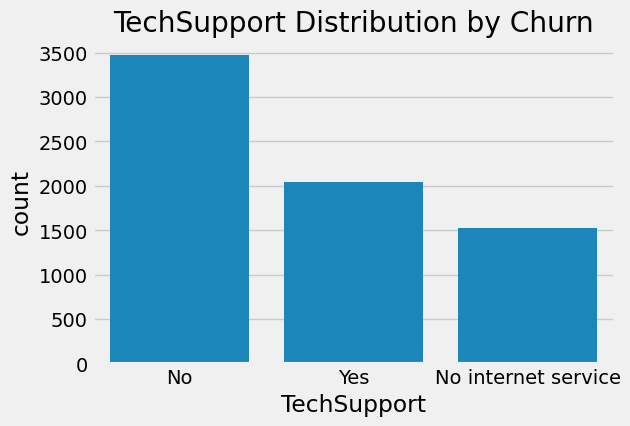

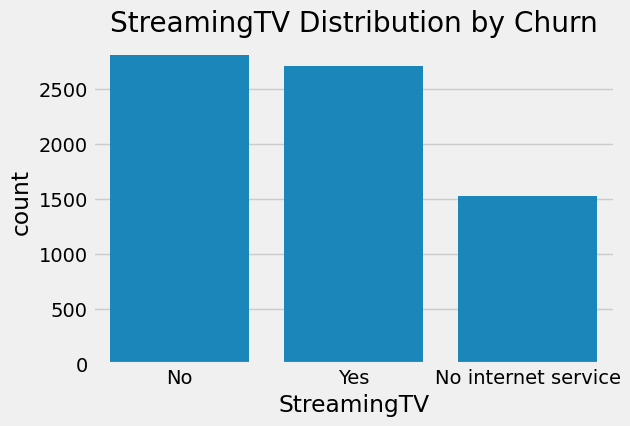

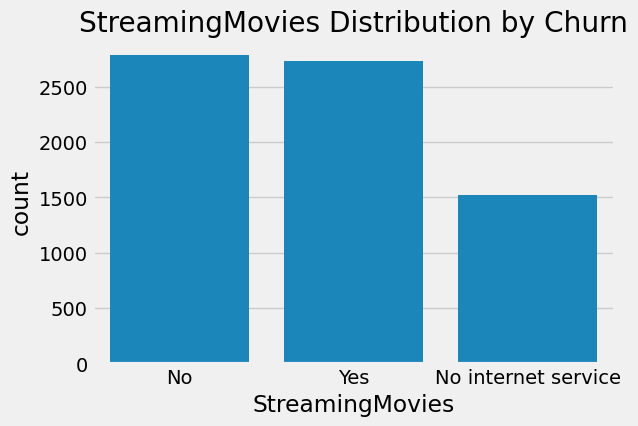

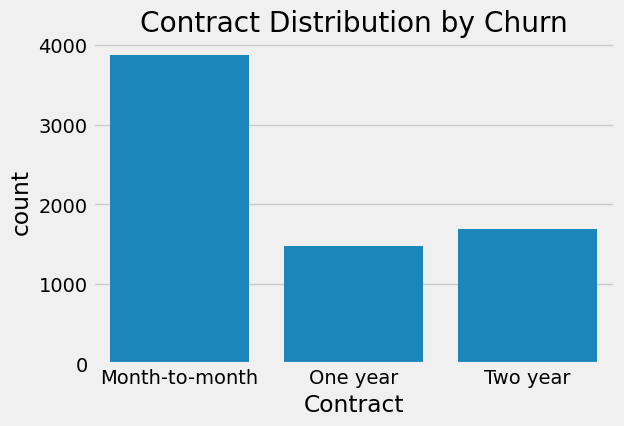

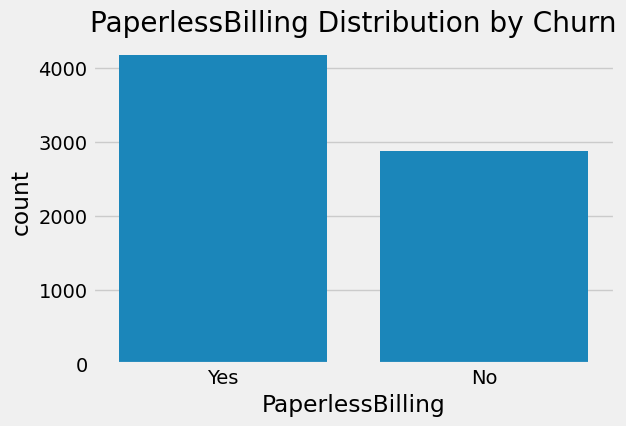

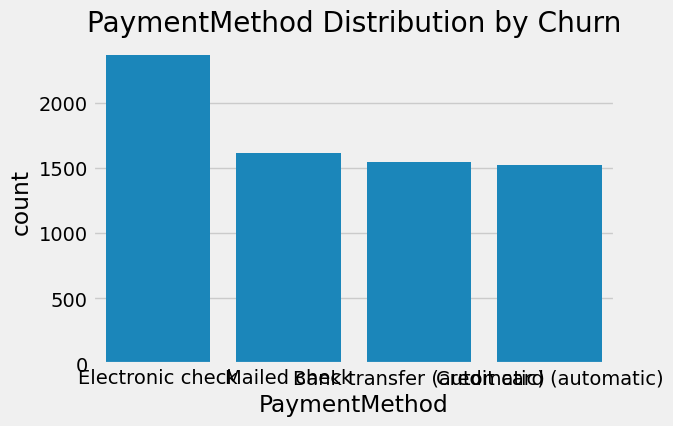

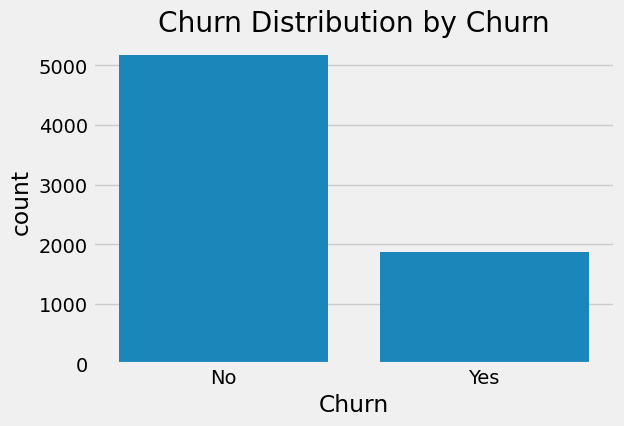

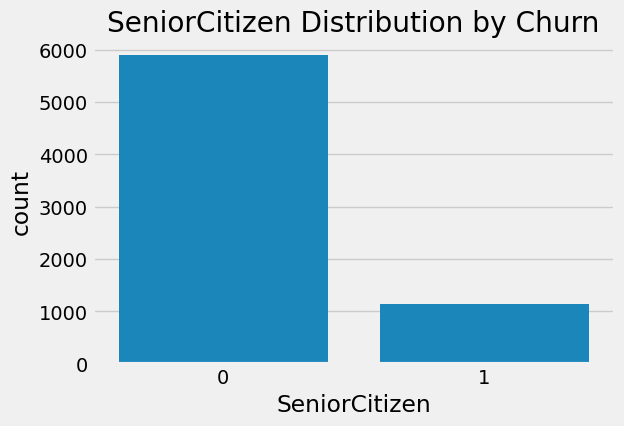

In [18]:
categorical_cols = df.select_dtypes(include = "object").columns.to_list() + ['SeniorCitizen']

for col in categorical_cols:
    plt.figure(figsize = (6, 4))
#     sns.countplot(data = df, x = col, hue = 'Churn')
    sns.countplot(x = df[col])
    plt.title(f"{col} Distribution by Churn")
    plt.show()

### Distribution of Target variable :

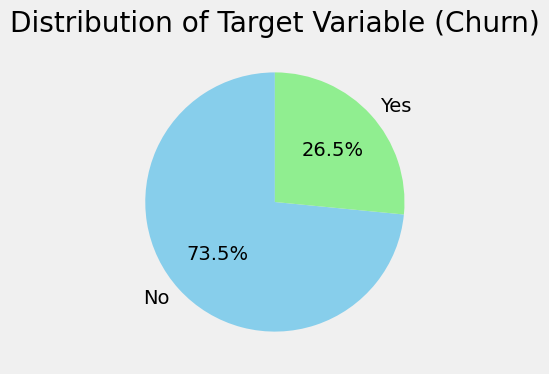

In [19]:
# Target variable plot :
plt.figure(figsize=(6, 4))
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=90)
plt.title('Distribution of Target Variable (Churn)')
plt.ylabel('')


# Show the plot
plt.show()

### Correlation analysis :

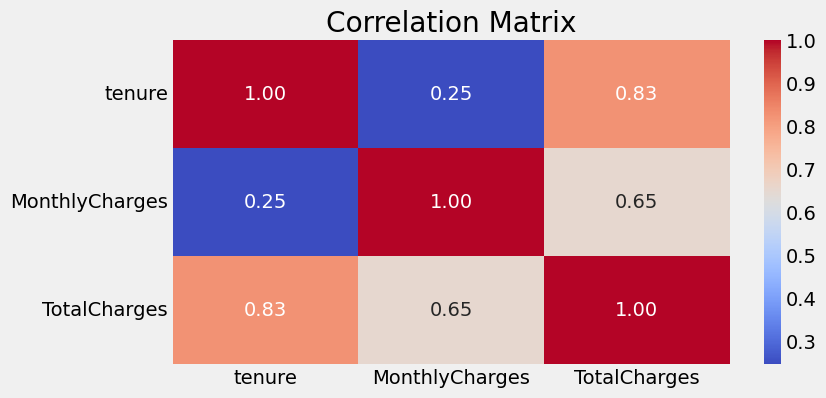

In [20]:
plt.figure(figsize = (8, 4))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

## Binary Encoding of Binary Variables :

In [21]:
# Label Encoding
df['Churn'] = df['Churn'].replace({"Yes": 1, "No": 0})

## Label Encoding of Categorical Variables :

In [22]:
objects_columns = df.select_dtypes(include = "object").columns

In [23]:
objects_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [24]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for column in objects_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder

In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [27]:
import pickle
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoders, f)

## Standard scaling (standardization) for numerical columns :

In [28]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [29]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.992611,0
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.172165,0
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.958066,1
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.193672,0
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.938874,1


# Model training :

In [30]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

## Preparing X(features) and Y(target) variables :

In [31]:
X = df.drop(columns = ['Churn'] )
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.992611
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.172165
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.958066
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.193672
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.938874


In [32]:
X.shape

(7043, 19)

## Target :

In [33]:
y = df['Churn']

## Separate the dataset into train and test :

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((5634, 19), (1409, 19))

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [36]:
y_train.value_counts()

,count
Churn,
0,4138
1,1496


In [37]:
smote = SMOTE(random_state = 42)

In [38]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [39]:
y_train_smote.value_counts()

,count
Churn,
0,4138
1,4138


## Models :

In [40]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

## Hyperparameters Tunning :

Hyperparameter tuning refers to the process of selecting the best set of hyperparameters for a machine learning model to improve its performance.

In [41]:
hyperparameters = {
    "Random Forest" :{
        "n_estimators": [50,100, 200],
        "max_depth": [5, 10, None],
    },
    "XGBoost":{
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7],
    }
}

In [42]:
best_models = {}
for model_name , model in models.items():
    print(f"Tunning {model_name}......")
    grid = GridSearchCV(estimator=model, param_grid=hyperparameters[model_name], cv=5, scoring = "accuracy")
    grid.fit(X_train_smote, y_train_smote)
    best_models[model_name] =grid.best_estimator_
    print(f"Best parameters for {model_name} : {grid.best_params_}")
    print(f"Best Accuracy for {model_name} : {grid.best_score_: .2f}\n")

Tunning Random Forest......
Best parameters for Random Forest : {'max_depth': None, 'n_estimators': 200}
Best Accuracy for Random Forest :  0.84

Tunning XGBoost......
Best parameters for XGBoost : {'learning_rate': 0.2, 'max_depth': 7}
Best Accuracy for XGBoost :  0.82



In [43]:
best_models

{'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.2, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=7, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=42, ...)}

In [44]:
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_models['Random Forest'], f)

In [45]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

## Evaluation :

In [46]:
y_test_pred = best_models['Random Forest'].predict(X_test)
y_test_prob = best_models['Random Forest'].predict_proba(X_test)[:, 1]

In [47]:
y_test_pred

array([1, 0, 0, ..., 0, 0, 0])

In [48]:
y_test_prob

array([0.915, 0.42 , 0.01 , ..., 0.   , 0.02 , 0.35 ])

In [49]:
print(f"Accuracy : ", accuracy_score(y_test, y_test_pred))
print(f"ROC - AUC Score : ", roc_auc_score(y_test, y_test_pred))
print(f"Confusion Matrix : \n", confusion_matrix(y_test, y_test_pred))
print(f"Classification Report : \n", classification_report(y_test, y_test_pred))

Accuracy :  0.7785663591199432
ROC - AUC Score :  0.7456201413976212
Confusion Matrix : 
 [[845 191]
 [121 252]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      1036
           1       0.57      0.68      0.62       373

    accuracy                           0.78      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.78      0.78      1409



In [50]:
with open("best_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)
with open("encoder.pkl", "rb") as f:
    encoders = pickle.load(f)
with open("scaler.pkl", "rb") as f:
    scaler_data =pickle.load(f)

## Prediction :

In [51]:
def make_prediction(input_data):
    input_df = pd.DataFrame([input_data])
    for col, encoder in encoders.items():
        input_df[col] = encoder.transform(input_df[col])
    numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
    input_df[numerical_cols] = scaler_data.transform(input_df[numerical_cols])
    prediction = loaded_model.predict(input_df)[0]
    probability = loaded_model.predict_proba(input_df)[0, 1]
    return "Churn" if prediction == 1 else "No Churn", probability

In [52]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [53]:
example_input = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

In [54]:
prediction, prob = make_prediction(example_input)

In [55]:
print(f"Prediction: {prediction}, Probability : {prob : .2f}")

Prediction: No Churn, Probability :  0.24
